# Task 1

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
df = pd.read_csv("sendy_logistics.csv")
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [5]:
df["Temp_Diff"] = df["Temperature"].apply(lambda x : x-24)

In [6]:
df[["Temp_Diff","Temperature"]].head()

,Temp_Diff,Temperature
0,-3.6,20.4
1,2.4,26.4
2,NaN,NaN
3,-4.8,19.2
4,-8.6,15.4


In [7]:
df["Fehr_Temp"] = df["Temperature"].apply(lambda x : (x*9/5) + 32)

In [8]:
df[["Fehr_Temp","Temperature"]].head()

,Fehr_Temp,Temperature
0,68.72,20.4
1,79.52,26.4
2,NaN,NaN
3,66.56,19.2
4,59.72,15.4


# Task 2

In [10]:
df2 = pd.read_csv("ufo.csv")
df2.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [11]:
df2["Time"] = pd.to_datetime(df2["Time"],format="%m/%d/%Y %H:%M")

In [12]:
def month_checker(row):
    if row["Time"].month == 12 :
        return 1
    else:
        return 0

In [14]:
df2["IN_December"] = df2.apply(month_checker,axis=1)
df2.head(5)

,City,Colors Reported,Shape Reported,State,Time,IN_December
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,0
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,0
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,0
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,0
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,0


In [18]:
df2["Time_Diff_From_WW1"] = abs(datetime(1914,7,28) - df2["Time"]) / np.timedelta64(1,"Y")

In [19]:
df2.head()

,City,Colors Reported,Shape Reported,State,Time,IN_December,Time_Diff_From_WW1
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,0,15.846778
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,0,15.925949
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,0,16.554983
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,0,16.845087
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,0,18.726714


# Task 3

In [20]:
df3 = pd.read_csv("titanic_full.csv")
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
def extract_title(name):
    if 'Mr.' in name:
        return 'Mr'
    elif 'Miss.' in name:
        return 'Miss'
    elif 'Mrs.' in name:
        return 'Mrs'
    else:
        return 'Untitled'

df3['Title'] = df3['Name'].apply(extract_title)
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Untitled
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


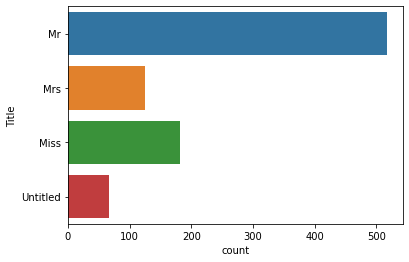

In [23]:
sns.countplot(data = df3 , y = "Title");

In [24]:
df4 = pd.read_csv("sendy_logistics.csv")
df4.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [28]:
df4["user id"] = df["User Id"].apply(lambda x : x.split("_")[2])
df4.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,user id
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,633
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,2285
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,265
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,1402
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,1737


# Task 4

### 1) Using visitor-interests.csv dataset, from the first 50 row extract Browser, OS, Device data from 'UserAgent' column and use it to create new columns for Browser, OS, Device.

In [30]:
df5 = pd.read_csv("visitor-interests.csv")
df5 = df5.head()
df5.head()

,IP,UserAgent,Country,Languages,Interests
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company


In [40]:
!pip install pyyaml ua-parser user-agents
import user_agents
from user_agents import parse

In [51]:
def extractor(data):
    ua = user_agents.parse(data)
    return pd.Series((ua.browser.family,ua.os.family,ua.device.family))

In [42]:
df5[['Browser', 'OS', 'Device']] = df5["UserAgent"].apply(extractor)
df5.head()

,IP,UserAgent,Country,Languages,Interests,Browser,OS,Device
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other,Chrome,Windows,Other
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage,Chrome,Windows,Other
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website,Chrome,Windows,Other
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company,Chrome,Android,Nexus 9
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company,Mobile Safari,iOS,iPad


In [52]:
df5 = pd.read_csv("visitor-interests.csv")
df5 = df5.head(50)
df5.head()

,IP,UserAgent,Country,Languages,Interests
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company


In [50]:
df5.shape

(50, 5)

In [58]:
!pip install --upgrade requests urllib3
import urllib.request
!pip install ip2geotools
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo


     |████████████████████████████████| 414 kB 25.6 MB/s 
     |████████████████████████████████| 843 kB 44.4 MB/s 
     |████████████████████████████████| 829 kB 58.4 MB/s 
     |████████████████████████████████| 45 kB 2.7 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 258 kB 54.1 MB/s 
     |████████████████████████████████| 42 kB 881 kB/s 
     |████████████████████████████████| 98 kB 8.9 MB/s 
     |████████████████████████████████| 57 kB 5.2 MB/s 
     |████████████████████████████████| 963 kB 48.8 MB/s 
     |████████████████████████████████| 103 kB 50.8 MB/s 
     |████████████████████████████████| 330 kB 49.6 MB/s 
     |████████████████████████████████| 78 kB 7.3 MB/s 
     |████████████████████████████████| 1.1 MB 53.7 MB/s 
     |████████████████████████████████| 94 kB 3.9 MB/s 
     |████████████████████████████████| 144 kB 42.4 MB/s 
     |████████████████████████████████| 271 kB 48.4 MB/s 
     |██████████████████████

In [59]:
def IP_details(IP):
    try:
        response = ip2geo.get(IP, api_key='free')
        return pd.Series((response.latitude , response.longitude))
    except:
        return np.nan

In [60]:
df5[["latitude","longitude"]] = df5["IP"].apply(IP_details)
df5.head(5)

,IP,UserAgent,Country,Languages,Interests,latitude,longitude
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other,NaN,NaN
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage,NaN,NaN
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website,35.643227,139.740055
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company,-34.928181,138.599931
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company,-33.854816,151.216454


# Task 5

### 1) Using visitor-interests.csv dataset, from the first 50 row extract latitude, longitude from 'IP' column and use it to create new 'Dist_From_Egypt' column calculating distance with Egypt Lat/Long.
#### note: you can get this location from google.

In [61]:
df5 = pd.read_csv("visitor-interests.csv")
df5 = df5.head(50)
df5.head()

,IP,UserAgent,Country,Languages,Interests
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company


In [64]:
from geopy.distance import great_circle

In [65]:
def IP_details(IP):
    try:
        response = ip2geo.get(IP, api_key='free')
        country = (response.latitude , response.longitude)
        Egypt = (26.8206, 30.8025)
        return great_circle(country,Egypt).kilometers
    except:
        return np.nan

In [66]:
df5["Dist_From_Egypt"] = df5["IP"].apply(IP_details)
df5.head()

,IP,UserAgent,Country,Languages,Interests,Dist_From_Egypt
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other,4442.927162
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage,4442.927162
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website,9831.933017
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company,13211.553670
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company,14321.430721


# Task 6
1. Using Restaurant_Reviews.csv dataset extract Bag Of Words CountVectorizer Features.
2. Using Restaurant_Reviews.csv dataset extract TfidfVectorizer Features.

**1) Using Restaurant_Reviews.csv dataset extract Bag Of Words CountVectorizer Features.**

In [81]:
df = pd.read_csv('Restaurant_Reviews.csv', sep='\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [82]:
reviews = df['Review']

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
vectorizer = CountVectorizer(stop_words='english')
reviews_vecctor = vectorizer.fit_transform(reviews)
reviews_vecctor.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [85]:
pd.DataFrame(reviews_vecctor.toarray(), columns=vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,10,100,11,12,15,17,1979,20,2007,...,year,years,yellow,yellowtail,yelpers,yucky,yukon,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**2) Using Restaurant_Reviews.csv dataset extract TfidfVectorizer Features.**

In [86]:
df = pd.read_csv('Restaurant_Reviews.csv', sep='\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [87]:
reviews = df['Review']

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [89]:
vectorizer = TfidfVectorizer(stop_words='english')
reviews_vecctor = vectorizer.fit_transform(reviews)
reviews_vecctor.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [90]:
pd.DataFrame(reviews_vecctor.toarray(), columns=vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,10,100,11,12,15,17,1979,20,2007,...,year,years,yellow,yellowtail,yelpers,yucky,yukon,yum,yummy,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
